<a href="https://colab.research.google.com/github/twnklstar/PMA/blob/main/Kelompok_13_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Oleh kelompok 13 Kelas PMA (C): Bintang, Femi, Dzaky

In [ ]:
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Jatim 2015 - 2022.csv to Jatim 2015 - 2022 (3).csv


In [ ]:
data = pd.read_csv("Jatim 2015 - 2022.csv")
data["datetime"] = pd.to_datetime(data["datetime"])
data

,datetime,total_visitor,total_accomodation
0,2014-01-01,16870,17382
1,2014-02-01,16476,17592
2,2014-03-01,18776,18192
3,2014-04-01,19145,18472
4,2014-05-01,20299,18790
...,...,...,...
103,2022-08-01,8386,58532
104,2022-09-01,9152,59224
105,2022-10-01,9415,59679
106,2022-11-01,9644,60021


In [ ]:
#normalisasi biar gk bias
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = data.copy()
data_scaled["total_visitor"] = scaler.fit_transform(data["total_visitor"].values.reshape(-1,1))
data_scaled["total_accomodation"] = scaler.fit_transform(data["total_accomodation"].values.reshape(-1,1))

In [ ]:
#X, y = shuffle(data_scaled["total_visitor"],data_scaled["total_accomodation"], random_state=3)

In [ ]:
X=data_scaled["total_accomodation"]
y=data_scaled["total_visitor"]

In [ ]:
data_train_1 = int(0.8 * len(data))

# Split the data into training and testing sets
train_X_1, train_y_1 = X[:data_train_1], y[:data_train_1]
test_X_1, test_y_1 = X[data_train_1:], y[data_train_1:]

# to array
train_X_1 = np.array(train_X_1)
train_y_1 = np.array(train_y_1)
test_X_1 = np.array(test_X_1)
test_y_1 = np.array(test_y_1)

In [ ]:
data_train_2 = int(0.7 * len(data))

# Split the data into training and testing sets
train_X_2, train_y_2 = X[:data_train_2], y[:data_train_2]
test_X_2, test_y_2 = X[data_train_2:], y[data_train_2:]

# to array
train_X_2 = np.array(train_X_2)
train_y_2 = np.array(train_y_2)
test_X_2 = np.array(test_X_2)
test_y_2 = np.array(test_y_2)

In [ ]:
data_train_3 = int(0.6 * len(data))

# Split the data into training and testing sets
train_X_3, train_y_3 = X[:data_train_3], y[:data_train_3]
test_X_3, test_y_3 = X[data_train_3:], y[data_train_3:]

# to array
train_X_3 = np.array(train_X_3)
train_y_3 = np.array(train_y_3)
test_X_3= np.array(test_X_3)
test_y_3 = np.array(test_y_3)

In [ ]:
data_scaled = data_scaled.set_index("datetime")

In [ ]:
# Display results
lengths = {
    'X_train_1': len(train_X_1),
    'y_train_1': len(train_y_1),
    'X_test_1': len(test_X_1),
    'y_test_1': len(test_y_1)
}

# Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)

           Length
X_train_1      86
y_train_1      86
X_test_1       22
y_test_1       22


In [ ]:
train_X_1

array([0.        , 0.00390182, 0.01504989, 0.02025232, 0.02616079,
       0.03195779, 0.03602683, 0.04163802, 0.04461084, 0.04830828,
       0.04886568, 0.05386373, 0.05488564, 0.05717099, 0.06237342,
       0.06683265, 0.07071589, 0.07905836, 0.09206444, 0.10092715,
       0.10811765, 0.11634864, 0.12863009, 0.13448282, 0.14288103,
       0.14826926, 0.16017911, 0.17101132, 0.17398413, 0.18619126,
       0.19327028, 0.20283904, 0.20926776, 0.2138013 , 0.21673696,
       0.22506085, 0.23195407, 0.23745378, 0.24811876, 0.25103584,
       0.25913677, 0.27238439, 0.27673213, 0.27970495, 0.28752717,
       0.29391873, 0.30205682, 0.31077089, 0.31513721, 0.3233682 ,
       0.33615132, 0.33912413, 0.34209695, 0.34969622, 0.35679382,
       0.36303673, 0.36799762, 0.37647015, 0.38182122, 0.38576021,
       0.3945486 , 0.40738745, 0.42022631, 0.4292005 , 0.44177923,
       0.45041898, 0.45580721, 0.46465134, 0.47042976, 0.48050018,
       0.48285985, 0.48756062, 0.50013935, 0.50294495, 0.51511

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid_search_1 = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=3, cv=3)
grid_search_1.fit(train_X_1.reshape(-1,1), train_y_1)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=-3.137 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=-1.324 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=-0.506 total time=   0.0s
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.916 total time=   0.0s
[CV 2/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-1.048 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.577 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.1, kernel=linear;, score=-1.422 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.1, kernel=linear;, score=-2.241 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.1, kernel=linear;, score=-0.575 total time=   0.0s
[CV 1/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.094 total time=   0.0s
[CV 2/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-1.791 total time=   0.0s
[CV 3/3] END ..C=0.01, epsilon=0.1, ker

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
grid_search_2 = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=3, cv=3)
grid_search_2.fit(train_X_2.reshape(-1,1), train_y_2)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=-3.489 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=-0.123 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=-0.306 total time=   0.0s
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-2.544 total time=   0.0s
[CV 2/3] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.218 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.118 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.1, kernel=linear;, score=-4.924 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.011 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.1, kernel=linear;, score=-0.340 total time=   0.0s
[CV 1/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-3.362 total time=   0.0s
[CV 2/3] END ...C=0.01, epsilon=0.1, kernel=rbf;, score=0.105 total time=   0.0s
[CV 3/3] END ..C=0.01, epsilon=0.1, kern

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
grid_search_3 = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=3, cv=3)
grid_search_3.fit(train_X_3.reshape(-1,1), train_y_3)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=-4.854 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=-0.004 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=-1.557 total time=   0.0s
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-4.324 total time=   0.0s
[CV 2/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.011 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-1.158 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.1, kernel=linear;, score=-7.374 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.1, kernel=linear;, score=-0.401 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.1, kernel=linear;, score=-1.552 total time=   0.0s
[CV 1/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-5.941 total time=   0.0s
[CV 2/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.400 total time=   0.0s
[CV 3/3] END ..C=0.01, epsilon=0.1, ker

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
best_params_1 = grid_search_1.best_params_
print("Best Parameters:", best_params_1)

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}


In [ ]:
best_params_2 = grid_search_2.best_params_
print("Best Parameters:", best_params_2)
best_params_3 = grid_search_3.best_params_
print("Best Parameters:", best_params_3)

Best Parameters: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}
Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}


In [ ]:
test_y_1

array([1.52198092e-03, 3.16103729e-03, 4.68301821e-03, 5.29766434e-03,
       1.52198092e-03, 2.92688638e-04, 5.85377276e-05, 1.08294796e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.66832524e-03, 4.29666920e-02, 1.34578236e-01, 1.38207575e-01,
       1.78159574e-01, 2.45448692e-01, 2.67868641e-01, 2.75566353e-01,
       2.82268922e-01, 4.17491073e-01])

In [ ]:
regressor_1 = SVR(kernel='rbf', C=1.0, epsilon=0.01)
regressor_1.fit(train_X_1.reshape(-1,1), train_y_1)

y_pred_1 = regressor_1.predict(test_X_1.reshape(-1,1))

# Calculate evaluation metrics
mae_1 = mean_absolute_error(test_y_1, y_pred_1)
mse_1 = mean_squared_error(test_y_1, y_pred_1)
mape_1 = np.mean(abs((test_y_1-y_pred_1)/test_y_1))*100

print("Mean Absolute Error (MAE) Skenario 1:", mae_1)
print("Mean Squared Error (MSE) Skenario 1:", mse_1)
print("Mean Absolute Percentage Error (MAPE) Skenario 1:", mape_1)

Mean Absolute Error (MAE) Skenario 1: 0.17350794782118556
Mean Squared Error (MSE) Skenario 1: 0.04057103059971706
Mean Absolute Percentage Error (MAPE) Skenario 1: inf


<ipython-input-128-034c1009e12a>:9: RuntimeWarning: divide by zero encountered in divide
  mape_1 = np.mean(abs((test_y_1-y_pred_1)/test_y_1))*100


In [ ]:
regressor_2 = SVR(kernel='rbf', C=0.1, epsilon=0.1)
regressor_2.fit(train_X_2.reshape(-1,1), train_y_2)
y_pred_2 = regressor_2.predict(test_X_2.reshape(-1,1))

# Calculate evaluation metrics
mae_2 = mean_absolute_error(test_y_2, y_pred_2)
mse_2 = mean_squared_error(test_y_2, y_pred_2)
mape_2 = np.mean(abs((test_y_2-y_pred_2)/test_y_2))*100

print("Mean Absolute Error (MAE) Skenario 2:", mae_2)
print("Mean Squared Error (MSE) Skenario 2:", mse_2)
print("Mean Absolute Percentage Error (MAPE) Skenario 2:", mape_2)

Mean Absolute Error (MAE) Skenario 2: 0.434118765599882
Mean Squared Error (MSE) Skenario 2: 0.1968046219071901
Mean Absolute Percentage Error (MAPE) Skenario 2: inf


<ipython-input-129-4d2982d3afb3>:8: RuntimeWarning: divide by zero encountered in divide
  mape_2 = np.mean(abs((test_y_2-y_pred_2)/test_y_2))*100


In [ ]:
regressor_3 = SVR(kernel='linear', C=1.0, epsilon=0.1)
regressor_3.fit(train_X_3.reshape(-1,1), train_y_3)
y_pred_3 = regressor_3.predict(test_X_3.reshape(-1,1))

# Calculate evaluation metrics
mae_3 = mean_absolute_error(test_y_3, y_pred_3)
mse_3 = mean_squared_error(test_y_3, y_pred_3)
mape_3 = np.mean(abs((test_y_3-y_pred_3)/test_y_3))*100

print("Mean Absolute Error (MAE) Skenario 3 :", mae_3)
print("Mean Squared Error (MSE) Skenario 3 :", mse_3)
print("Mean Absolute Percentage Error (MAPE) Skenario 3 :", mape_3)

Mean Absolute Error (MAE) Skenario 3 : 0.6218578966295264
Mean Squared Error (MSE) Skenario 3 : 0.4568165124203487
Mean Absolute Percentage Error (MAPE) Skenario 3 : inf


<ipython-input-130-8590e1f0fde2>:8: RuntimeWarning: divide by zero encountered in divide
  mape_3 = np.mean(abs((test_y_3-y_pred_3)/test_y_3))*100


In [ ]:
# Inverse transform the scaled predictions to original scale
pred_y_1 = scaler.inverse_transform(y_pred_1.reshape(-1,1))
pred_y_2 = scaler.inverse_transform(y_pred_2.reshape(-1,1))
pred_y_3 = scaler.inverse_transform(y_pred_3.reshape(-1,1))


# Inverse transform the original test set to compare with predictions
y_test_1 = scaler.inverse_transform(test_y_1.reshape(-1,1))
y_test_2 = scaler.inverse_transform(test_y_2.reshape(-1,1))
y_test_3 = scaler.inverse_transform(test_y_3.reshape(-1,1))


In [ ]:
y_test_1

array([[17463.91453492],
       [17552.13018791],
       [17634.04472282],
       [17667.12559269],
       [17463.91453492],
       [17397.75279518],
       [17385.15055904],
       [17440.28534215],
       [17382.        ],
       [17382.        ],
       [17382.        ],
       [17382.        ],
       [17471.79093251],
       [19694.51033191],
       [24625.13522215],
       [24820.46988234],
       [26970.72642393],
       [30592.29403501],
       [31798.95814552],
       [32213.25665867],
       [32573.99566821],
       [39851.78703975]])

In [ ]:
total_vis = data_scaled['total_visitor'].values
total_vis = total_vis.reshape((-1))

look_back=12

def predict(num_prediction, model):
    prediction_list = total_vis[-look_back:]

    for i in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((-1, 1))
        out = model.predict(x)[0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]

    return prediction_list

def predict_dates(num_prediction):
    last_date = data_scaled.index[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq='MS').tolist()
    return prediction_dates

num_prediction = 12
forecast_1 = predict(num_prediction, regressor_1)
forecast_dates_1 = predict_dates(num_prediction)

In [ ]:
num_prediction = 12
forecast_2 = predict(num_prediction, regressor_2)
forecast_dates_2 = predict_dates(num_prediction)

In [ ]:
num_prediction = 12
forecast_3 = predict(num_prediction, regressor_3)
forecast_dates_3 = predict_dates(num_prediction)

In [ ]:
df_pred_1= pd.DataFrame({"prediction": forecast_1
                       }, index=forecast_dates_1)
df_pred_1

,prediction
2022-12-01,0.417491
2023-01-01,0.541143
2023-02-01,0.541143
2023-03-01,0.540028
2023-04-01,0.512222
2023-05-01,0.504063
2023-06-01,0.505782
2023-07-01,0.531316
2023-08-01,0.593946
2023-09-01,0.622346


In [ ]:
df_pred_2= pd.DataFrame({"prediction": forecast_2
                       }, index=forecast_dates_2)
df_pred_3= pd.DataFrame({"prediction": forecast_3
                       }, index=forecast_dates_3)

In [ ]:
data = data.set_index(data["datetime"], drop=True)

In [ ]:
data

,datetime,total_visitor,total_accomodation
datetime,,,
2014-01-01,2014-01-01,16870,17382
2014-02-01,2014-02-01,16476,17592
2014-03-01,2014-03-01,18776,18192
2014-04-01,2014-04-01,19145,18472
2014-05-01,2014-05-01,20299,18790
...,...,...,...
2022-08-01,2022-08-01,8386,58532
2022-09-01,2022-09-01,9152,59224
2022-10-01,2022-10-01,9415,59679


In [ ]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual data')
    plt.plot(y_pred, alpha=0.7, color='orange',
    label='Predicted data')
    plt.title(title)
    plt.xlabel('Time Step')
    plt.legend()
    plt.show()

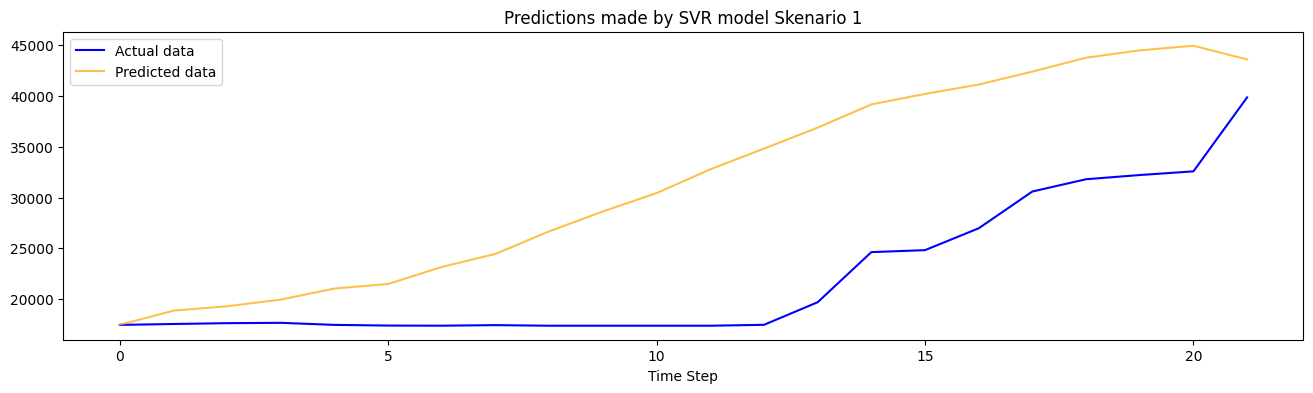

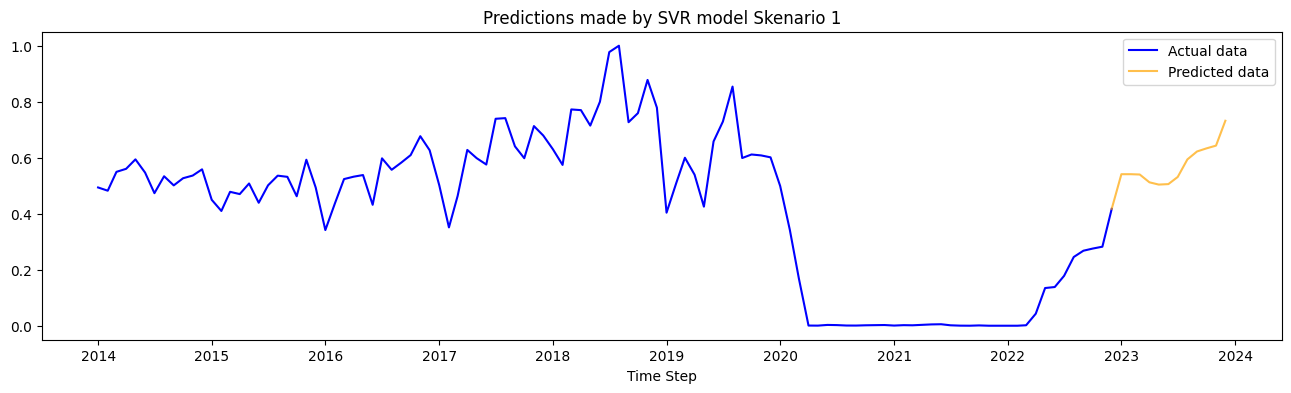

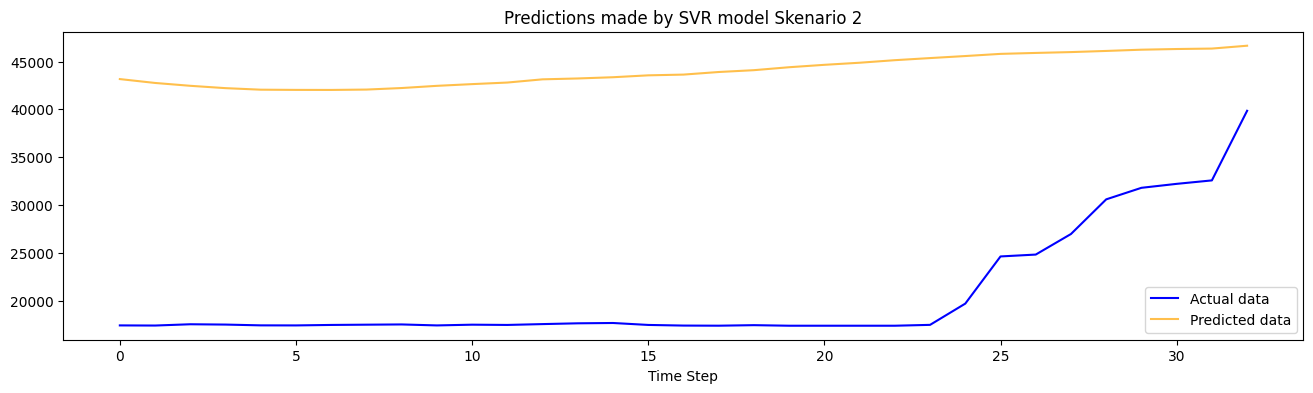

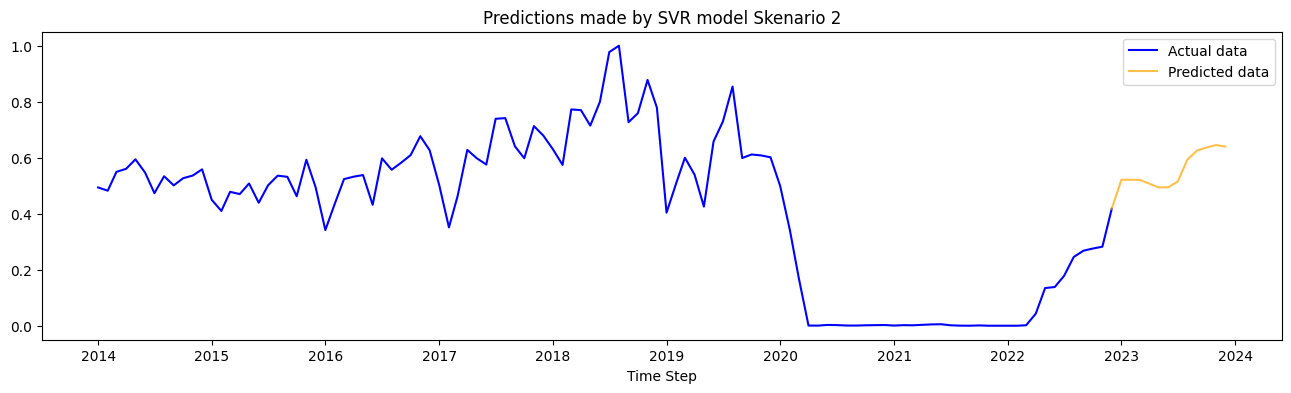

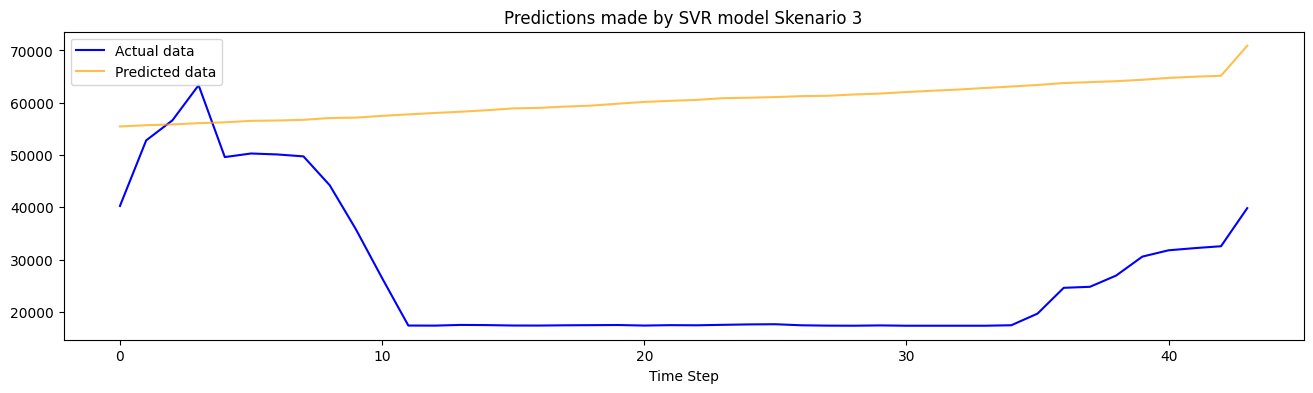

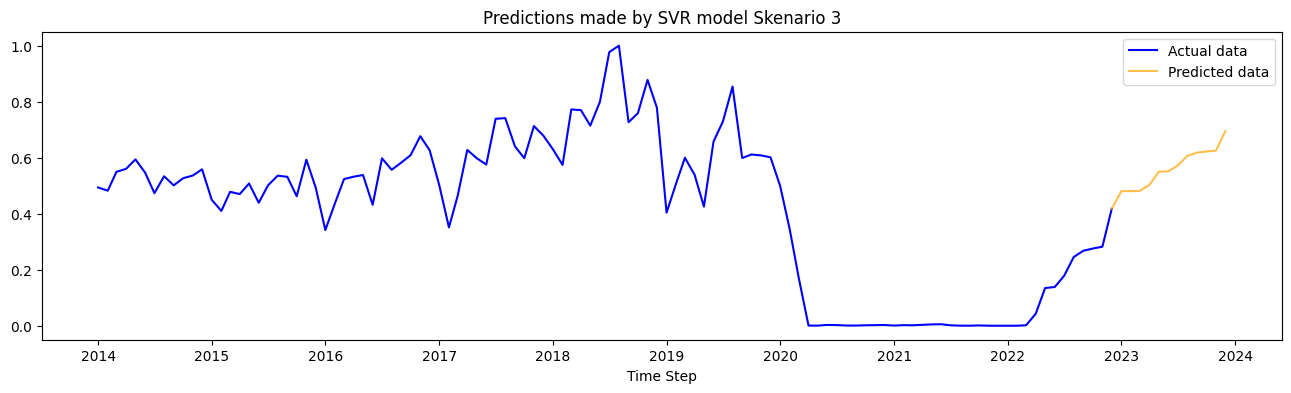

In [ ]:
plotting_actual_vs_pred(y_test_1, pred_y_1, "Predictions made by SVR model Skenario 1")
plotting_actual_vs_pred(data_scaled["total_visitor"], df_pred_1, "Predictions made by SVR model Skenario 1")

plotting_actual_vs_pred(y_test_2, pred_y_2, "Predictions made by SVR model Skenario 2")
plotting_actual_vs_pred(data_scaled["total_visitor"], df_pred_2, "Predictions made by SVR model Skenario 2")

plotting_actual_vs_pred(y_test_3, pred_y_3, "Predictions made by SVR model Skenario 3")
plotting_actual_vs_pred(data_scaled["total_visitor"], df_pred_3, "Predictions made by SVR model Skenario 3")

In [ ]:
summary = pd.DataFrame({
    "Mean Absolute Error (MAE)": [mae_1,mae_2,mae_3],
    "Mean Squared Error (MSE)": [mse_1,mse_2,mse_3],
    "Mean Absolute Percentage Error (MAPE)": [mape_1, mape_2, mape_3]
})

summary

,Mean Absolute Error (MAE),Mean Squared Error (MSE),Mean Absolute Percentage Error (MAPE)
0,0.173508,0.040571,inf
1,0.434119,0.196805,inf
2,0.621858,0.456817,inf
